<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/Bessel_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
from scipy import signal
from scipy import misc
from sklearn.datasets import load_sample_image


In [38]:
x = np.linspace(-5,5,1000)
J = jv(1,2*x)/(2*x + 0.0001)

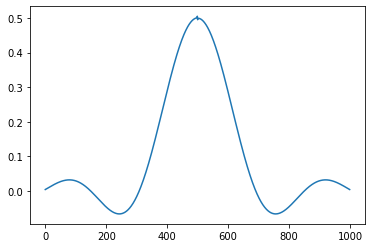

In [39]:
plt.plot(J)

In [100]:
def mask_fourier(a, window_size):
  x = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  J = 2 * np.pi * a**2 * jv(1,a*(np.sqrt(X**2+ Y**2)))/(a*(np.sqrt(X**2+ Y**2)) + 0.0001) 
  return J,X,Y

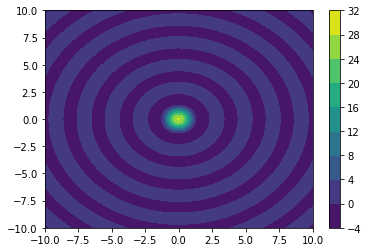

In [86]:
J,X,Y = mask_fourier(3,10)
plt.contourf(X,Y,J)
plt.colorbar()

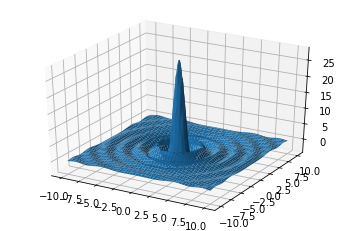

In [87]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, J)


In [88]:
window_size = 5
a = 5
x_sample = np.linspace(-5,5,window_size)
X_s, Y_s = np.meshgrid(x_sample,x_sample)
J,X,Y = mask_fourier(a,window_size)


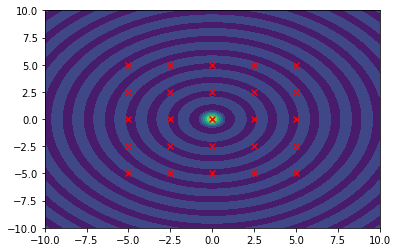

In [89]:
plt.contourf(X,Y,J)
plt.scatter(X_s, Y_s, marker='x', c='r')

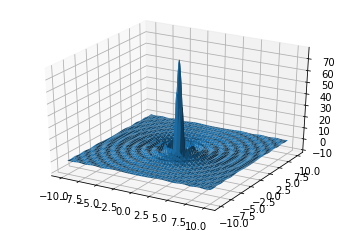

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, J)

In [91]:
x_samp = np.linspace(0,50*window_size-1,window_size,dtype=int)
x_samp

array([  0,  62, 124, 186, 249])

In [92]:
X_samp, Y_samp = np.meshgrid(x_samp, x_samp)

In [93]:
weights = J[x_samp][:,x_samp]
weights = weights / np.sum(weights)

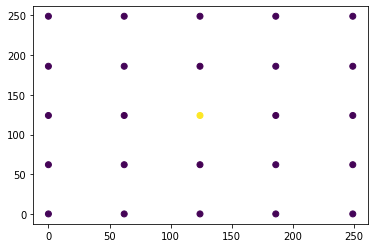

In [94]:
plt.scatter(X_samp, Y_samp, c=weights)


## Image

In [95]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [96]:
flower = load_sample_image("flower.jpg") / 255
flower =  rgb2gray(flower)
flower.shape

(427, 640)

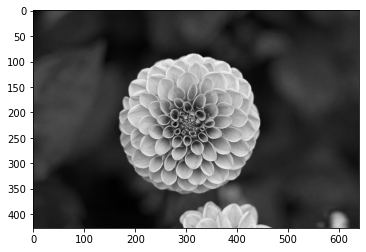

In [97]:
plt.imshow(flower, cmap='gray')

In [101]:
def mask_fourier(a, window_size):
  x = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  J = 2 * np.pi * a**2 * jv(1,a*(np.sqrt(X**2+ Y**2)))/(a*(np.sqrt(X**2+ Y**2)) + 0.0001) 
  return J,X,Y

In [102]:
def get_weights(window_size, a):
  x  = np.linspace(-10,10,100*window_size)
  result,X,Y = mask_fourier(a, window_size)
  x_samp = np.linspace(0,100*window_size-1,window_size,dtype=int)
  X_samp, Y_samp = np.meshgrid(x_samp, x_samp)
  weights = result[x_samp][:,x_samp]
  #weights = weights / np.sum(weights)
  return X_samp, Y_samp,weights

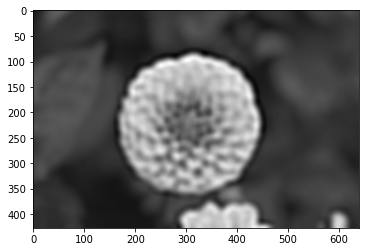

In [107]:
window_size = 30
a = 0.5
X_samp, Y_samp, weights = get_weights(window_size,a)
grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')

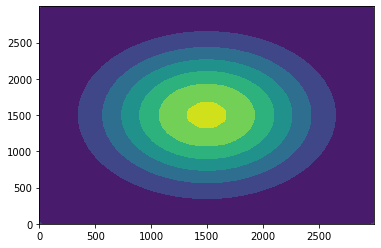

In [108]:
plt.contourf(X_samp, Y_samp, weights)

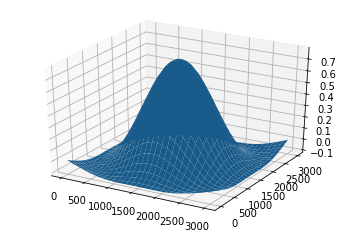

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_samp, Y_samp, weights)

## Iteration on the different hole sizes

Note that the window size is 30. I have chosen this number to make the effect of the filter more visible.



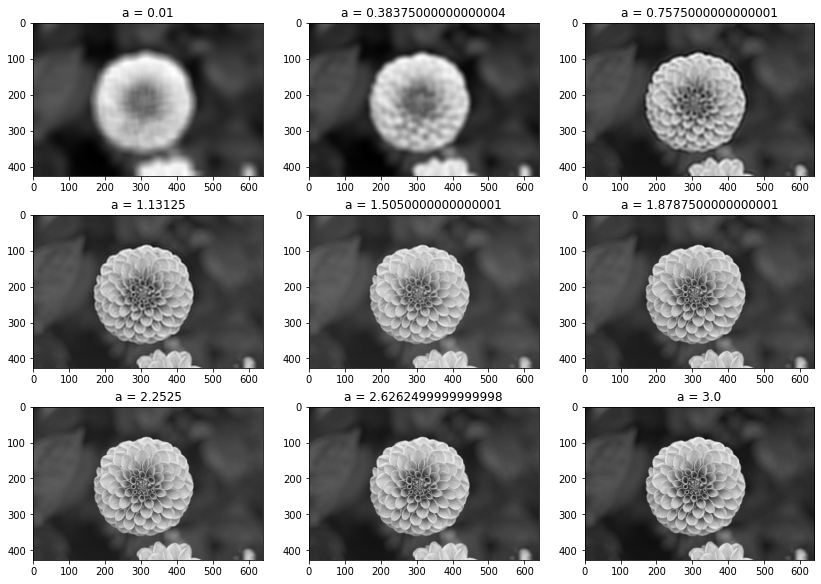

In [113]:
a = np.linspace(0.01,3,9).reshape((3,3))
fig, ax = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
  for j in range(3):
    X_samp, Y_samp, weights = get_weights(30,a[i,j])
    grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')
    ax[i,j].imshow(grad, cmap='gray')
    ax[i,j].set_title("a = {}".format(a[i,j]) )